In [1]:
import nest

In [2]:
MGN_params = {
        'E_L': -60.,  # resting membrane potential (mV) - see refs
        'C_m': 150.0,      # membrane capacity (pF)
        'g_L': 10.0,      # leak conductance  - see refs
        'V_reset': -55.,  # reset membrane potential after a spike (mV)  - for burstiness
        'V_th': -50.,  # spike threshold (mV)
        'tau_syn_ex': 2.5, # exc. synaptic time constant  - mit paper
        'tau_syn_in': 10., # exc. synaptic time constant  - mit paper

        "a": 40.,
        "b": 0.,
        'tau_w': 150.,
}


TRN_params = {
        'E_L': -60.,  # resting membrane potential (mV) - see refs
        'C_m': 150.0,      # membrane capacity (pF)
        'g_L': 10.0,      # leak conductance  - see refs
        'V_reset': -55.,  # reset membrane potential after a spike (mV)  - for burstiness
        'V_th': -50.,  # spike threshold (mV)
        'tau_syn_ex': 2.5, # exc. synaptic time constant  - mit paper
        'tau_syn_in': 10., # exc. synaptic time constant  - mit paper
        "a": 30.,
        "b": 80.,
        'tau_w': 300.
}

In [3]:
nest.ResetKernel()

neuron = nest.Create("aeif_cond_exp", 2)

nest.SetStatus(neuron[0], MGN_params)
nest.SetStatus(neuron[1], TRN_params)

neuron.V_m = -60. # (if needed)

dc = nest.Create("dc_generator", 2)
inp_amp = 500.  # it's in pA
nest.SetStatus(dc, [{"amplitude": inp_amp, "start": 100.0, "stop": 500.0},
                    {"amplitude": -inp_amp, "start": 100.0, "stop": 500.0}])

nest.Connect(dc, neuron, 'one_to_one')
voltmeter1 = nest.Create("voltmeter", 2)
nest.Connect(voltmeter1, neuron, 'one_to_one')

nest.Simulate(1000.0)

[[<matplotlib.lines.Line2D at 0x7fc5fac58790>]]

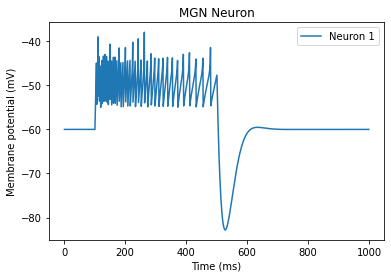

In [41]:
nest.voltage_trace.from_device(voltmeter1[0], title="MGN Neuron")

[[<matplotlib.lines.Line2D at 0x7fc5fac3ae50>]]

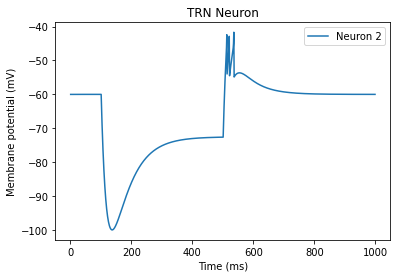

In [42]:
nest.voltage_trace.from_device(voltmeter1[1], title="TRN Neuron")